<a href="https://colab.research.google.com/github/Abir-Adhikari/Loan-Prediction/blob/main/LoanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving train_u6lujuX_CVtuZ9i.csv to train_u6lujuX_CVtuZ9i.csv


In [2]:
#Importing Python Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

#Setting Seaborn Styles
sb.set()

# For implementing pipeline
from sklearn.pipeline import Pipeline

# For Scaling the data
from sklearn.preprocessing import StandardScaler

# For Classification
from sklearn.neighbors import KNeighborsClassifier

# For Splitting the data for training and Validation
from sklearn.model_selection import train_test_split

# For creating model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Principal Component Analysis for Dimensionality Reduction
from sklearn.decomposition import PCA

# For Shuffling the DataFrame
from sklearn.utils import shuffle

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [3]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

#Print First 5 Entries
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Last 5 Rows
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
#Information About the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#Description about the dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#Return tuple of shape
df.shape

(614, 13)

In [8]:
#Check if the data is null
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0      False   False    False       False      False          False   
1      False   False    False       False      False          False   
2      False   False    False       False      False          False   
3      False   False    False       False      False          False   
4      False   False    False       False      False          False   
..       ...     ...      ...         ...        ...            ...   
609    False   False    False       False      False          False   
610    False   False    False       False      False          False   
611    False   False    False       False      False          False   
612    False   False    False       False      False          False   
613    False   False    False       False      False          False   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           

In [9]:
#Check if data is duplicated
df.duplicated().sum()

0

In [10]:
#Individual Number Of Datasets
print("The Loan Prediction Dataset has")
print("\t\tNumber of Factors : \t", df.shape[1] - 1)
print("\t\tNumber of Samples : \t", df.shape[0])

The Loan Prediction Dataset has
		Number of Factors : 	 12
		Number of Samples : 	 614


# **Exploratory Data Analysis**

In [11]:
#Print Factors Of Loan Data
print('Loan Data Factors : \n')
j = 1
for i in df.columns:
    print(j, '.', i)
    j += 1

Loan Data Factors : 

1 . Loan_ID
2 . Gender
3 . Married
4 . Dependents
5 . Education
6 . Self_Employed
7 . ApplicantIncome
8 . CoapplicantIncome
9 . LoanAmount
10 . Loan_Amount_Term
11 . Credit_History
12 . Property_Area
13 . Loan_Status


**Check if Data is balannced or imbalanced**

In [12]:
# Check is there any null values on Loan_Status
df['Loan_Status'].isnull().sum()

0

In [13]:
#Get unique values and value_counts on Loan_Status
print("Unique values : ", df['Loan_Status'].unique())
print("Unique values counts : \n", df['Loan_Status'].value_counts())

Unique values :  ['Y' 'N']
Unique values counts : 
 Y    422
N    192
Name: Loan_Status, dtype: int64


<Axes: xlabel='Loan_Status', ylabel='count'>

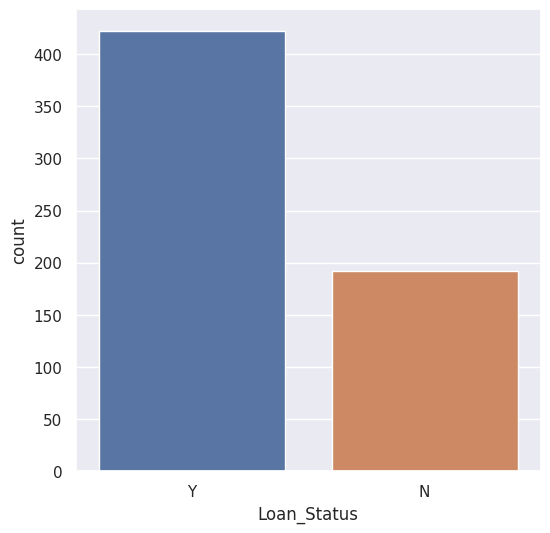

In [14]:
#Plot the Unique value counts
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Loan_Status', data = df)



*   **It is a Imbalanced Dataset.**
*   Two-third of Loan_Status is having **Yes** value.
*   One-third of Loan_Status is having **No** value.





**Remove the samples having null values in any of the columns and Loan_Status**

In [15]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
df.Dependents.dtypes

dtype('O')

# **Exploring Each Factors**

**1.   Loan Id**




In [17]:
df['Loan_ID'].describe()

count          614
unique         614
top       LP001002
freq             1
Name: Loan_ID, dtype: object

**2.Gender**



In [18]:
df['Gender'].describe()

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

In [19]:
print("Number of null values : ", df['Gender'].isnull().sum())
print("Unique values : ", df['Gender'].unique())
print("Value counts : \n", df['Gender'].value_counts())

Number of null values :  13
Unique values :  ['Male' 'Female' nan]
Value counts : 
 Male      489
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

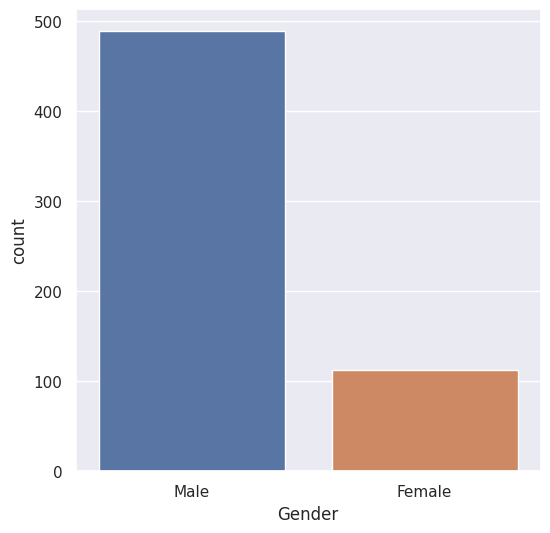

In [20]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Gender', data = df)

In [21]:
#Print the samples having null values in gender column
null_v = df[df['Gender'].isnull()]
null_v

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


**3. Married**

In [22]:
df['Married'].describe()

count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object

In [23]:
print("Number of null values : ", df['Married'].isnull().sum())
print("Unique values : ", df['Married'].unique())
print("Value counts : \n", df['Married'].value_counts())

Number of null values :  3
Unique values :  ['No' 'Yes' nan]
Value counts : 
 Yes    398
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

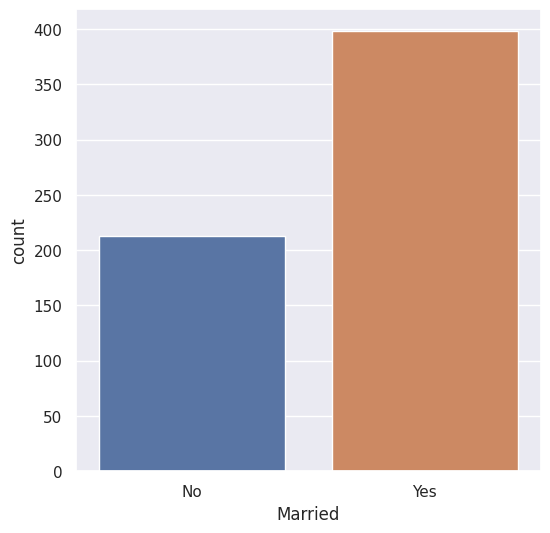

In [24]:
plt.figure(figsize = (6, 6))
sb.countplot(x = 'Married', data = df)

In [25]:
#Print the samples having null values in gender column
samples = df[df['Married'].isnull()]
samples

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


**Drop the samples having yes value on Loan_Status on the above samples listed**

In [26]:
df[df['Married'] == 'Yes'].describe(include = 'all').iloc[:, :]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,398,388,398,390,398,380,398.000000,398.000000,384.000000,389.000000,362.000000,398,398
unique,398,2,1,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001003,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,357,398,174,309,326,NaN,NaN,NaN,NaN,NaN,151,285
mean,NaN,NaN,NaN,NaN,NaN,NaN,5629.173367,1794.632965,155.750000,336.987147,0.842541,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6989.254425,2039.962354,89.934267,66.739163,0.364737,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,17.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2817.500000,0.000000,108.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3854.500000,1625.000000,132.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5820.500000,2464.000000,178.500000,360.000000,1.000000,NaN,NaN


In [27]:
#Fill null values in Married columns with 'Yes'
df['Married'] = df['Married'].fillna('Yes')

In [28]:
#Count Unique Value
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [29]:
#Encode Categorical Values to numerical values
df['Married'] = df['Married'].apply(lambda x : {'Yes' : 1, 'No' : 0}[x])

**4. Dependents**

In [30]:
#Describe Dependents
df['Dependents'].describe()

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object



1. **Dependents may be representing children.**
2. **If the applicant is not married, fill the null value with 0.**
3. **If the applicant is married, fill the value with 1.**  









In [31]:
#Count Number Of Null Values, Unique Values And Value Counts

print("Number of null values : ", df['Dependents'].isnull().sum())
print("Unique values : ", df['Dependents'].unique())
print("Value counts : \n", df['Dependents'].value_counts())

Number of null values :  15
Unique values :  ['0' '1' '2' '3+' nan]
Value counts : 
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


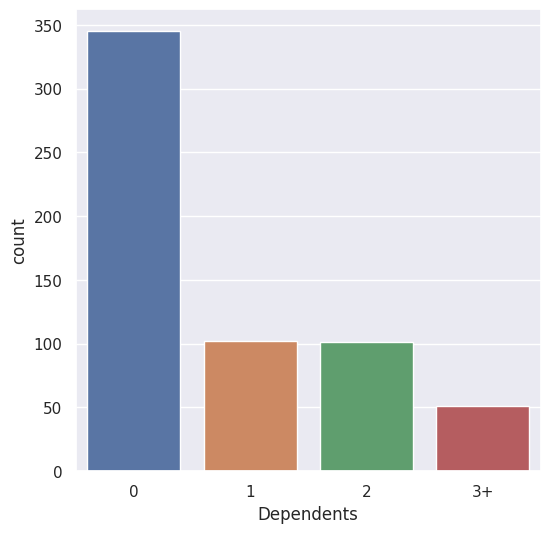

In [32]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Dependents', data = df)
plt.show()

In [33]:
#Display the 15 rows having null values in Dependents column
df[df['Dependents'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,1,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,1,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,1,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,1,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,1,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,0,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,1,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,0,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,1,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,1,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [34]:
#filling null values on dependents columns
def dependents_null_value_filler(df4):
    for row in range(df4.shape[0]):
        if df4.loc[row, 'Dependents'] is np.nan:
            df4.loc[row, 'Dependents'] = str(df4.loc[row, 'Married'])
    return df4

In [35]:
#Fill null values on Dependents column
df = dependents_null_value_filler(df)

In [36]:
#Encode Categorical data into NUmerical Data
df['Dependents'] = df['Dependents'].apply(lambda x : {'0' : 0, '1' : 1, '2' : 2, '3+' : 3}[x])

**5. Education**

In [37]:
#Description of Education Status
df['Education'].describe()

count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object



*   480 are Graduated Out of 614 applicants




In [38]:
#Total Null Values
df['Education'].isnull().sum()

0



*   There are no Null values in Education Column
*   Two Unique Values are there in Education Column
*   We can encode Graduate as 1 and Non-Graduate as 0



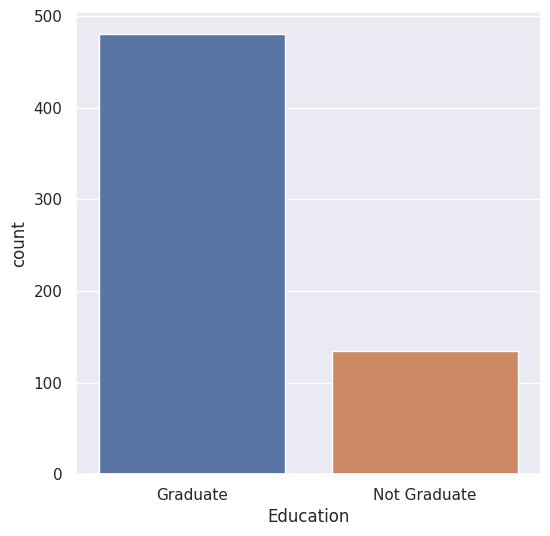

In [39]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Education', data = df)
plt.show()

In [40]:
#Encode categorical data into Numerical data
df['Education'] = df['Education'].apply(lambda x : {'Graduate' : 1, 'Not Graduate' : 0}[x])

**5. Applicant Income**

In [41]:
#Description of Applicant's Income
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [42]:
#Check for null values on ApplicantIncome column
df['ApplicantIncome'].isnull().sum()

0



*   There are no null values for the Applicant's Income



<ipython-input-43-5cdcf006e46f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['ApplicantIncome'], rug = True, bins = 100, color='r')


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

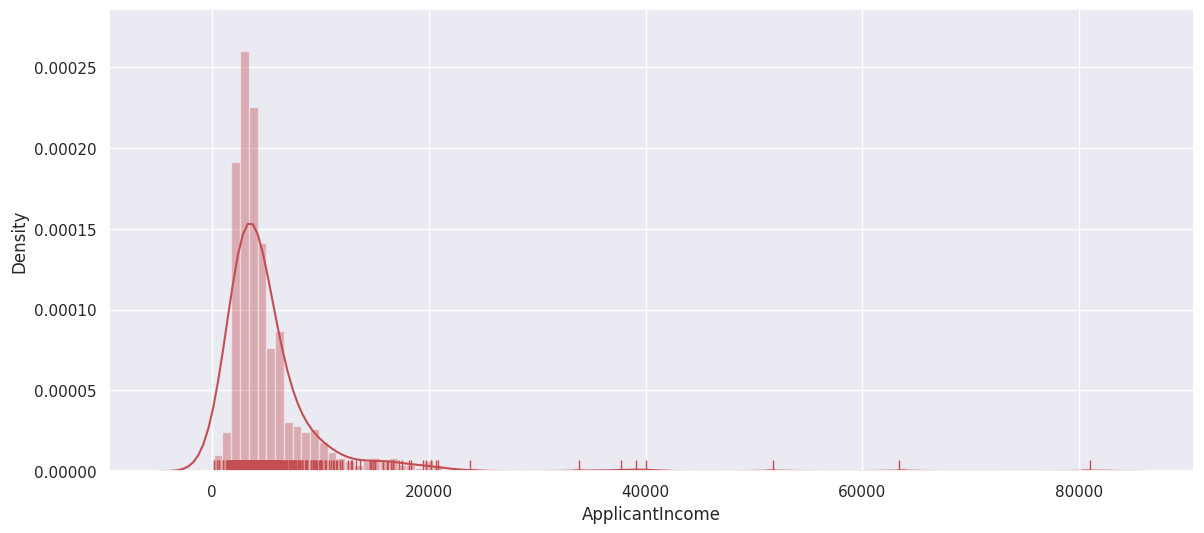

In [43]:
#Distplot
plt.figure(figsize = (14, 6))
sb.distplot(df['ApplicantIncome'], rug = True, bins = 100, color='r')



*   From the above distplot, most of the Applicants income less than Rs.10,000 and some considerable amount of applicants having income between Rs.10,000 and Rs.20,000



In [44]:
#Displaying the applicants having income more than 20,000
df[df['ApplicantIncome'] > 20000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
126,LP001448,NaN,1,3,1,No,23803,0.0,370.0,360.0,1.0,Rural,Y
130,LP001469,Male,0,0,1,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
155,LP001536,Male,1,3,1,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,LP001585,NaN,1,3,1,No,51763,0.0,700.0,300.0,1.0,Urban,Y
183,LP001637,Male,1,1,1,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
185,LP001640,Male,1,0,1,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
284,LP001922,Male,1,0,1,No,20667,0.0,NaN,360.0,1.0,Rural,N
308,LP001996,Male,0,0,1,No,20233,0.0,480.0,360.0,1.0,Rural,N
333,LP002101,Male,1,0,1,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
409,LP002317,Male,1,3,1,No,81000,0.0,360.0,360.0,0.0,Rural,N


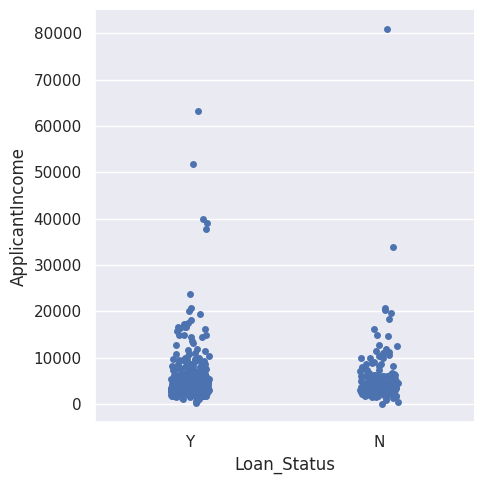

In [45]:
#Contribution of Applicant Income on determining Loan_Status
sb.catplot(x = 'Loan_Status', y = 'ApplicantIncome', data = df)

From the above categorical plot, Applicant's income failed to differentiate Loan_Status.

**6. Co-Applicant Income**

In [46]:
#Description on Co-applicant's Income
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [47]:
#Check For Null Values
df['CoapplicantIncome'].isnull().sum()

0

There are no null values in co-applicant's income

<ipython-input-48-69d35d9390c1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['CoapplicantIncome'], rug = True, color = 'r')


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

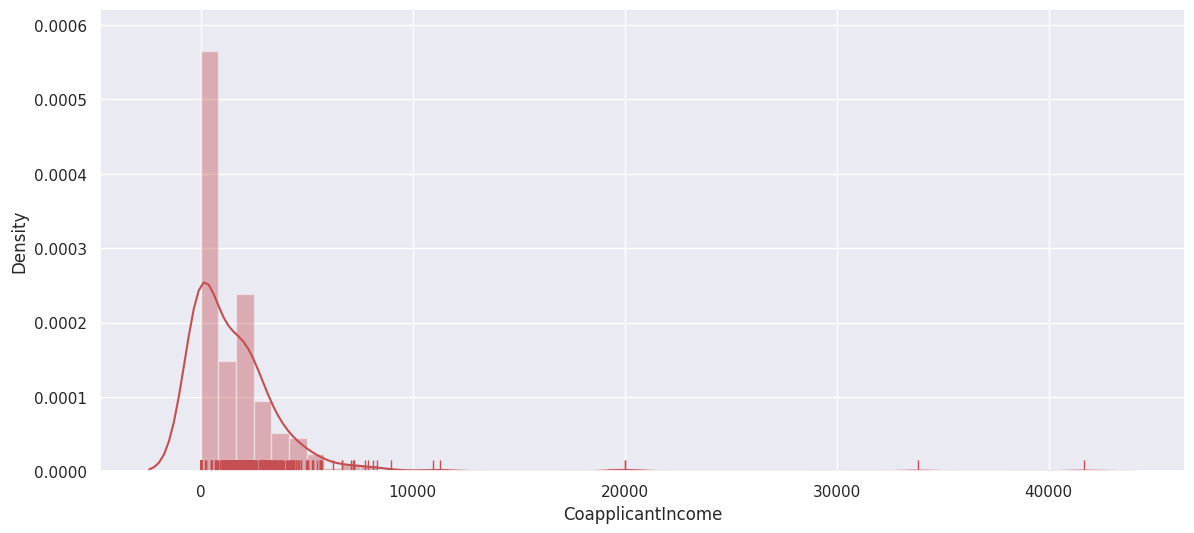

In [48]:
plt.figure(figsize = (14, 6))
sb.distplot(df['CoapplicantIncome'], rug = True, color = 'r')

From the above plot most of the co-applicant income is zero or nearer to zero

In [49]:
#Get the different values counts on CoapplicantIncome column
df['CoapplicantIncome'].value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

**7.  Loan Amount**

In [50]:
#Description of loan amount
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

<ipython-input-51-a2ed9b6e720f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['LoanAmount'], rug = True, color = 'r')


<Axes: xlabel='LoanAmount', ylabel='Density'>

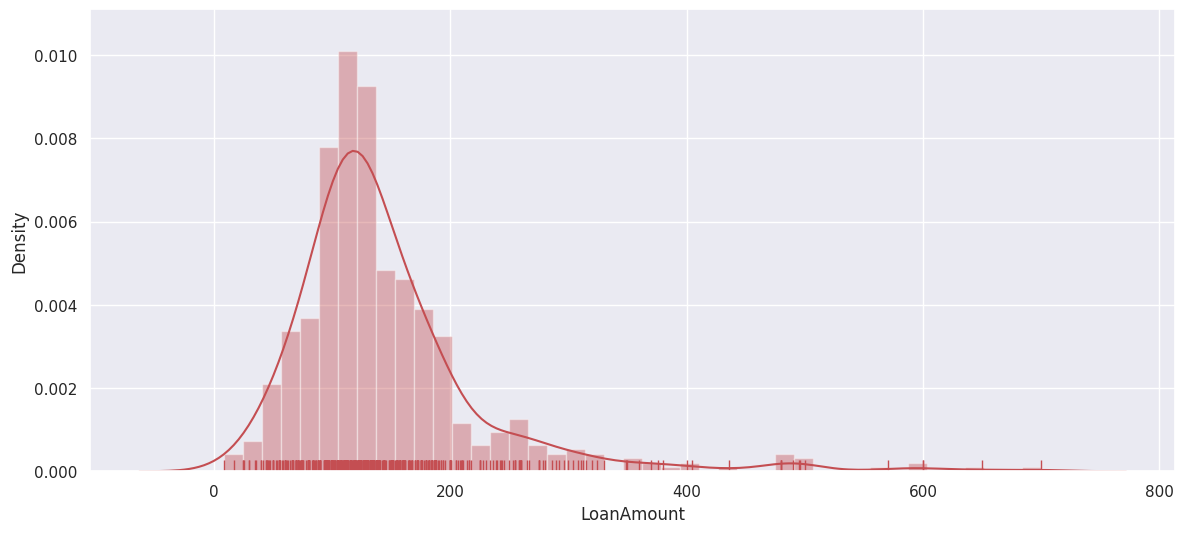

In [51]:
# Distribution of LoanAmount
plt.figure(figsize = (14, 6))
sb.distplot(df['LoanAmount'], rug = True, color = 'r')

In [53]:
#Count the null values
df['LoanAmount'].isnull().sum()

22

In [54]:
#Different Loan Amount counts
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [55]:
#Display 22 Null Values on Loan Amount
df[df['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,1,0,1,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,1,1,1,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,1,1,1,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,0,0,1,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,1,1,1,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,1,0,1,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,0,1,1,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,0,0,1,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,1,3,0,No,3992,0.0,NaN,180.0,1.0,Urban,N


**Drop the samples having yes value on Loan_Status on the above samples listed**

In [56]:
df[~df['LoanAmount'].isnull()].groupby('Loan_Status').describe().T.loc['LoanAmount']

Loan_Status,N,Y
count,181.000000,411.000000
mean,151.220994,144.294404
std,85.862783,85.484607
min,9.000000,17.000000
25%,100.000000,100.000000
50%,129.000000,126.000000
75%,176.000000,161.000000
max,570.000000,700.000000


**For yes in Loan_Status, average LoanAmount is 151.22 and no in Loan_Status, average LoanAmount is 144.29.**

In [57]:
#Fill Above values on LoanAmount column based on LoanStatus.
def LoanAmount_null_values_filler(loan):
    for row in range(loan.shape[0]):
        if pd.isnull(loan.loc[row, 'LoanAmount']):
            if loan.loc[row, 'Loan_Status'] == 'Y':
                loan.loc[row, 'LoanAmount'] = 151.22
            elif loan.loc[row, 'Loan_Status'] == 'N':
                loan.loc[row, 'LoanAmount'] = 144.29
            else:
                pass
    return loan

In [59]:
#Fill null values on LoanAmount
df = LoanAmount_null_values_filler(df)

# **Feature Selection**

In [60]:
#Display Columns in training data
print(" Columns in the Train Data : \n", df.columns)

 Columns in the Train Data : 
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


**We can remove some of the columns from the training data those columns are loan_id**



In [61]:
#Drop Loan_ID column from the Train data
df.drop('Loan_ID', axis = 1, inplace = True)

**Detecting Outliners**

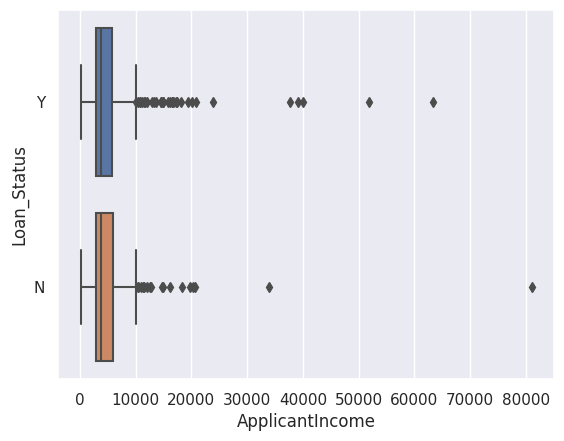

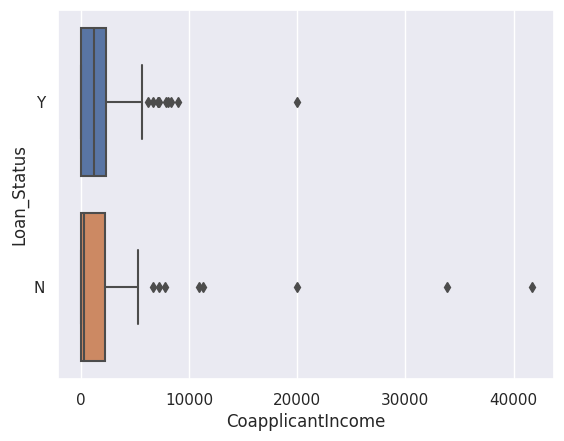

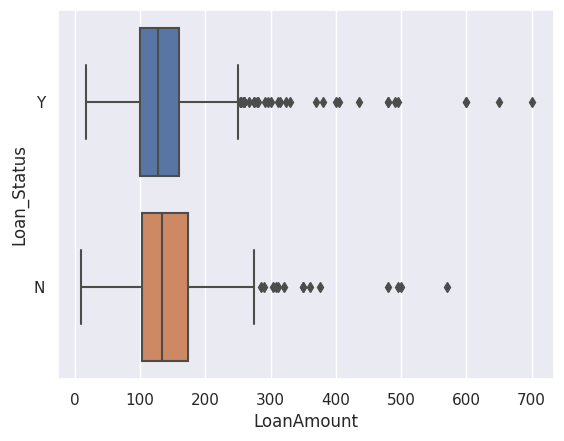

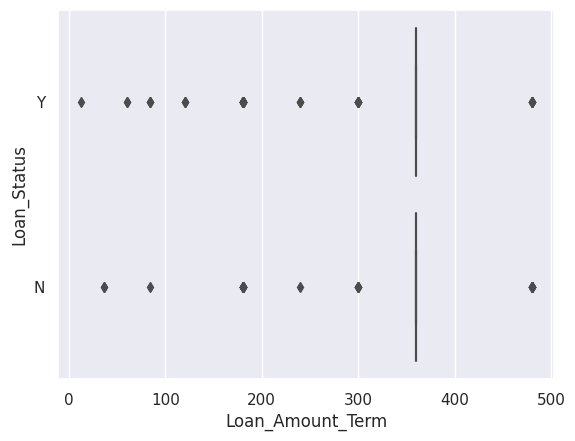

In [62]:
numerical_continuous_data_column = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for column in numerical_continuous_data_column:
    sb.boxplot(x = column, y = 'Loan_Status', data = df)
    plt.show()

In [63]:
#Display samples having outliers on ApplicantIncome
df[df['ApplicantIncome'] > 25000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,Male,1,3,1,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,NaN,1,3,1,No,51763,0.0,700.0,300.0,1.0,Urban,Y
183,Male,1,1,1,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
185,Male,1,0,1,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
333,Male,1,0,1,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
409,Male,1,3,1,No,81000,0.0,360.0,360.0,0.0,Rural,N
443,Male,0,1,1,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y


In [64]:
#Display samples having outliers on ApplicantIncome
df[df['CoapplicantIncome'] > 15000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
402,Male,0,0,1,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y
417,Male,1,2,1,Yes,1600,20000.0,239.0,360.0,1.0,Urban,N
581,Male,0,0,1,No,1836,33837.0,90.0,360.0,1.0,Urban,N
600,Female,0,3,1,NaN,416,41667.0,350.0,180.0,NaN,Urban,N


In [65]:
#Display Samples having outliers on LoanAmount
df[df['LoanAmount'] > 400]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
130,Male,0,0,1,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
155,Male,1,3,1,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,NaN,1,3,1,No,51763,0.0,700.0,300.0,1.0,Urban,Y
177,Male,1,3,1,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
278,Male,1,0,1,No,14583,0.0,436.0,360.0,1.0,Semiurban,Y
308,Male,0,0,1,No,20233,0.0,480.0,360.0,1.0,Rural,N
333,Male,1,0,1,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
369,Male,1,0,1,No,19730,5266.0,570.0,360.0,1.0,Rural,N
432,Male,0,0,1,NaN,12876,0.0,405.0,360.0,1.0,Semiurban,Y
487,Male,1,1,1,No,18333,0.0,500.0,360.0,1.0,Urban,N


# **Feature Observation**

In [79]:
#Rearrange Train Data columns in order to bring Loan_Status to the last of the DataFrame
df = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]

In [72]:
#feature correlation
loan_train_corr = df.corr()
loan_train_corr

<ipython-input-72-d33f8198f99d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_train_corr = df.corr()


,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Married,1.000000,0.348717,-0.012304,0.051708,0.075948,0.147312,-0.102049,0.006082
Dependents,0.348717,1.000000,-0.062281,0.119616,0.029628,0.162308,-0.097888,-0.044971
Education,-0.012304,-0.062281,1.000000,0.140760,0.062290,0.167342,0.078784,0.081822
ApplicantIncome,0.051708,0.119616,0.140760,1.000000,-0.116605,0.565583,-0.045306,-0.014715
CoapplicantIncome,0.075948,0.029628,0.062290,-0.116605,1.000000,0.187749,-0.059878,-0.002056
LoanAmount,0.147312,0.162308,0.167342,0.565583,0.187749,1.000000,0.039142,-0.007498
Loan_Amount_Term,-0.102049,-0.097888,0.078784,-0.045306,-0.059878,0.039142,1.000000,0.001470
Credit_History,0.006082,-0.044971,0.081822,-0.014715,-0.002056,-0.007498,0.001470,1.000000


<Axes: >

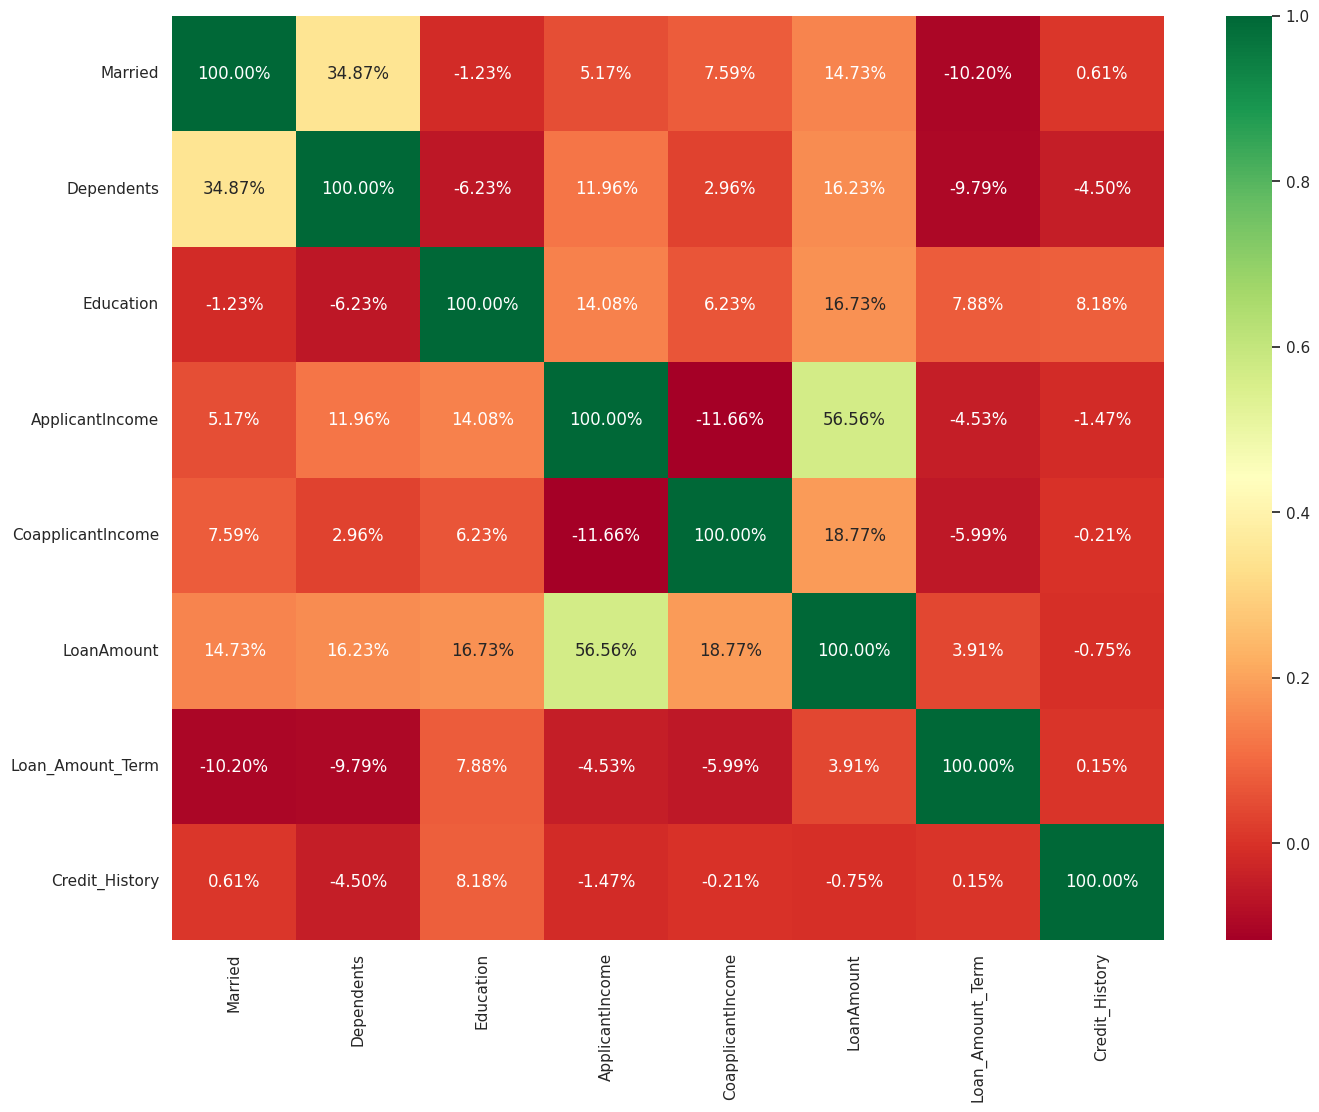

In [73]:
#Visualize Heatmap of correlation of features
plt.figure(figsize = (16, 12))
sb.heatmap(loan_train_corr, cmap = 'RdYlGn', annot = True, fmt = '.2%')